In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
os.chdir("C:\\Users\\Abhi's PC\\Downloads\\MP3SNGS")

In [19]:
dataset=pd.read_csv("driver-data (1).csv")

In [20]:
dataset

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [21]:
len(dataset)

4000

In [22]:
dataset.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [24]:
dataset.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [25]:
x=dataset.iloc[:,1:3].values

In [26]:
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [27]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)

In [28]:
x

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [29]:
from sklearn.cluster import KMeans


In [30]:
wcss=[]
for i in range(1,11):
    means=KMeans(n_clusters=i,init='k-means++')
    means.fit(x)
    wcss.append(means.inertia_)

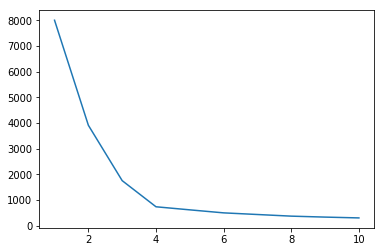

In [31]:
plt.plot(range(1,11),wcss)

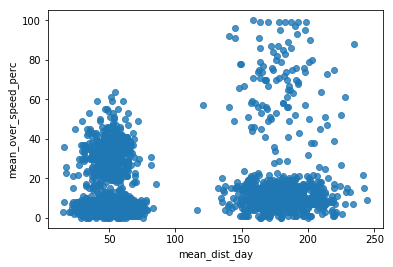

In [35]:
sns.regplot(data=dataset,x='mean_dist_day',y='mean_over_speed_perc',fit_reg=False)

In [62]:
wcss

[8000.0,
 3911.926390428416,
 1756.544582131428,
 739.1534508645581,
 619.4037594867996,
 503.17737112713417,
 437.8719286132289,
 374.4345636332523,
 338.1592629382936,
 308.7718049580842]

In [64]:
Kmeans=KMeans(n_clusters=4,init="k-means++")
y_means=Kmeans.fit_predict(x)


In [65]:
y_means

array([3, 3, 3, ..., 1, 1, 1])

In [68]:
pd.concat([dataset,pd.DataFrame(y_means)],axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3
5,3423313857,41.91,10,0
6,3423312432,58.64,20,3
7,3423311434,52.02,8,0
8,3423311328,31.25,34,3
9,3423312488,44.31,19,3


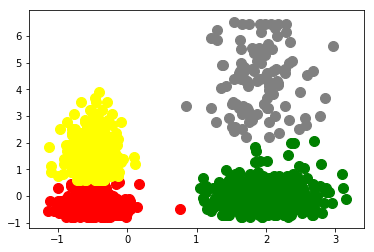

In [78]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='green',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='grey',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='yellow',label='cluster4')


In [83]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_means))

0.7843727073779401


Text(0.5, 1.0, 'dendrogram')

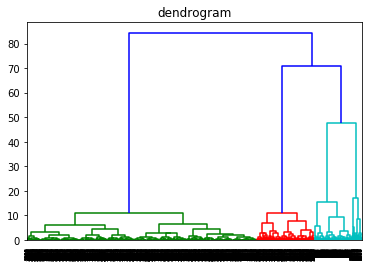

In [84]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('dendrogram')

In [85]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [88]:
y_hc=hc.fit_predict(x)

In [89]:
y_hc

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [91]:
pd.concat([dataset,pd.DataFrame(y_hc)],axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,1
1,3423313212,52.53,25,1
2,3423313724,64.54,27,1
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
5,3423313857,41.91,10,3
6,3423312432,58.64,20,1
7,3423311434,52.02,8,3
8,3423311328,31.25,34,1
9,3423312488,44.31,19,1


In [92]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_hc))

0.77889704091338


In [93]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_means))

0.7843727073779401


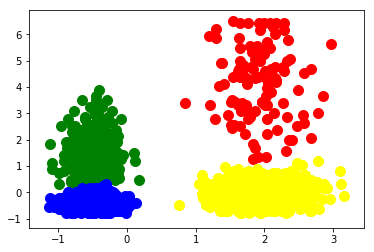

In [97]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='green',label='cluster2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='yellow',label='cluster3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='blue',label='cluster4')